# Toshare Coding Exercises

[Tushare API](https://tushare.pro/document/2?doc_id=27)
In this notebook you need create your own tushare account and create custom factors and filters for it. 

In [ ]:
!pip install tushare -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install stockstats -i https://pypi.tuna.tsinghua.edu.cn/simple

In [1]:
import tushare as ts
import pandas as pd
import numpy as np
from tqdm import tqdm
import time

print(ts.__version__)

1.2.89


## Initialized API

In [2]:
token = '' # your token
ts.set_token(token)
pro = ts.pro_api()

## Load Data

In [3]:
# got calendar from date range
start_date = '20200101'
end_date = '20210101'
calendar = pro.trade_cal(exchange='SSE', is_open='1', 
                            start_date=start_date, 
                            end_date=end_date, 
                            fields='cal_date')
# check all stocks exist in market today
stocks = pro.query('stock_basic', exchange='', list_status='L', market = '主板') # 主板/创业板/科创板/CDR/北交所

ts_code_list = ','.join(stocks.ts_code.values)
print(calendar.shape, stocks.shape)
stocks.head()

(243, 1) (2186, 7)


,ts_code,symbol,name,area,industry,market,list_date
0,000001.SZ,000001,平安银行,深圳,银行,主板,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,主板,19910129
2,000004.SZ,000004,ST国华,深圳,软件服务,主板,19910114
3,000005.SZ,000005,ST星源,深圳,环境保护,主板,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,主板,19920427


Data from Tushare had some constraints about 500 times request per min and 6000 line data per time.
So we create function to iterate calendar and reqest data from API

In [12]:
def _get_daily(ts_code='000001.SZ', start_date='', end_date=''):
    for _ in range(3):
        #try:
            df = pro.daily(ts_code=ts_code, start_date=start_date, end_date=end_date, adj='qfq')
            return df
        #except:
            time.sleep(1)

def get_Daily_All(ts_code_list, calendar):
    '''
    param: DateFrame 
            column:cal_date | index 1,2...n
    :return: DateFrame 
            comlumns: ts_code, trade_date, open, high, low, close, pre_close, change, pct_chg, vol, amount
            index: stock_code(600547.SH	)
    '''
    stocks_daily = pd.DataFrame()
    for date in tqdm(calendar['cal_date'].values):
        stocks_daily = stocks_daily.append(_get_daily(ts_code='', start_date=date, end_date=date))
    return stocks_daily

In [13]:
# load total stock daily date for one year
all_stocks = get_Daily_All(ts_code_list, calendar)
print(all_stocks.shape)
all_stocks

100%|█████████████████████████████████████████| 243/243 [04:03<00:00,  1.00s/it]

(945962, 11)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600125.SH,20201231,6.51,6.67,6.02,6.02,6.34,-0.32,-5.0473,1088978.62,677727.305
1,600126.SH,20201231,5.25,5.34,5.25,5.29,5.31,-0.02,-0.3766,159269.80,84334.280
2,600127.SH,20201231,11.10,11.35,11.05,11.25,11.22,0.03,0.2674,297524.15,333389.011
3,600128.SH,20201231,6.38,6.51,6.38,6.45,6.40,0.05,0.7813,42866.92,27670.021
4,600129.SH,20201231,13.28,13.50,13.20,13.33,13.33,0.00,0.0000,32851.54,43642.460
...,...,...,...,...,...,...,...,...,...,...,...
3735,600010.SH,20200102,1.33,1.34,1.32,1.33,1.32,0.01,0.7576,2042178.23,272334.002
3736,600017.SH,20200102,2.93,2.95,2.92,2.95,2.91,0.04,1.3746,153192.51,45031.267
3737,600052.SH,20200102,4.55,4.62,4.53,4.60,4.50,0.10,2.2222,188679.22,86406.944
3738,600055.SH,20200102,10.38,10.38,10.24,10.28,10.32,-0.04,-0.3876,75047.48,77337.057


In [14]:
# save data
all_stocks = all_stocks.drop_duplicates()
all_stocks.to_csv(start_date +'-'+ end_date + '.csv')

In [4]:
# load data from csv
all_stocks = pd.read_csv('20200101-20210101.csv').iloc[:,1:]
all_stocks

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600125.SH,20201231,6.51,6.67,6.02,6.02,6.34,-0.32,-5.0473,1088978.62,677727.305
1,600126.SH,20201231,5.25,5.34,5.25,5.29,5.31,-0.02,-0.3766,159269.80,84334.280
2,600127.SH,20201231,11.10,11.35,11.05,11.25,11.22,0.03,0.2674,297524.15,333389.011
3,600128.SH,20201231,6.38,6.51,6.38,6.45,6.40,0.05,0.7813,42866.92,27670.021
4,600129.SH,20201231,13.28,13.50,13.20,13.33,13.33,0.00,0.0000,32851.54,43642.460
...,...,...,...,...,...,...,...,...,...,...,...
945957,600010.SH,20200102,1.33,1.34,1.32,1.33,1.32,0.01,0.7576,2042178.23,272334.002
945958,600017.SH,20200102,2.93,2.95,2.92,2.95,2.91,0.04,1.3746,153192.51,45031.267
945959,600052.SH,20200102,4.55,4.62,4.53,4.60,4.50,0.10,2.2222,188679.22,86406.944
945960,600055.SH,20200102,10.38,10.38,10.24,10.28,10.32,-0.04,-0.3876,75047.48,77337.057


## Process Data
add some custom indicator by [stockstats](https://pypi.org/project/stockstats/)

In [5]:
universe = all_stocks.sort_index(axis=0, ascending=False)
# convert date to standard string format, easy to filter
universe["date"] = pd.to_datetime(universe["trade_date"], format='%Y%m%d')
universe["date"] = universe.date.apply(lambda x: x.strftime("%Y-%m-%d"))
# drop missing data
universe = universe.dropna()
universe = universe.sort_values(by=["date", "ts_code"]).reset_index(drop=True)

In [6]:
universe

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,date
0,000001.SZ,20200102,16.65,16.95,16.55,16.87,16.45,0.42,2.5532,1530231.87,2571196.482,2020-01-02
1,000002.SZ,20200102,32.80,33.60,32.51,32.56,32.18,0.38,1.1809,1012130.40,3342373.870,2020-01-02
2,000004.SZ,20200102,22.65,22.90,22.17,22.33,22.59,-0.26,-1.1510,17853.20,40144.977,2020-01-02
3,000005.SZ,20200102,3.11,3.15,3.11,3.14,3.09,0.05,1.6181,104134.12,32661.410,2020-01-02
4,000006.SZ,20200102,5.43,5.45,5.37,5.40,5.36,0.04,0.7463,124751.76,67452.865,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...
945957,688699.SH,20201231,54.00,56.33,53.70,55.17,54.20,0.97,1.7897,19365.10,107364.703,2020-12-31
945958,688777.SH,20201231,99.58,102.53,98.65,100.20,99.98,0.22,0.2200,21646.77,217684.620,2020-12-31
945959,688788.SH,20201231,134.49,138.50,131.27,133.30,133.00,0.30,0.2256,13474.66,180990.025,2020-12-31
945960,688981.SH,20201231,57.00,58.57,56.42,57.75,56.47,1.28,2.2667,471429.07,2721084.309,2020-12-31


In [26]:
import stockstats

def add_technical_indicator(universe, tech_indeicator_list, unique_ticker):
    """
    calculate technical indicators
    use stockstats package to add technical inidactors
    :param ticker: (df) pandas dataframe
    :param tech_indeicator_list list
    :return: (df) pandas dataframe
    """
    
    df = universe.sort_values(by=["ts_code", "date"])
    stock = stockstats.StockDataFrame.retype(df.copy())
    
    for indicator in tech_indicator_list:
        indicator_df = pd.DataFrame()
        for i in tqdm(range(len(unique_ticker)), desc=indicator):
            try:
                temp_indicator = stock[stock.ts_code == unique_ticker[i]][indicator]
                temp_indicator = pd.DataFrame(temp_indicator)
                temp_indicator["ts_code"] = unique_ticker[i]
                temp_indicator["date"] = df[df.ts_code == unique_ticker[i]]["date"].to_list()
                indicator_df = indicator_df.append(temp_indicator, ignore_index=True)
            except Exception as e:
                print(e)
        df = df.merge(
            indicator_df[["ts_code", "date", indicator]], on=["ts_code", "date"], how="left")
        
    df = df.sort_values(by=["date", "ts_code"])
    return df

In [27]:
tech_indicator_list = ['close_10_sma','close_30_sma','close_100_sma',
                       'amount_30_sma','amount_60_sma','close_delta',
                      'rsi', 'rsi_60',
                      'kdjk','kdjd','kdjj',
                      'macd','macds','macdh']
indicator_df = add_technical_indicator(universe, tech_indicator_list, stocks.ts_code.values[:100])

100%|█████████████████████████████████████████| 100/100 [00:12<00:00,  8.28it/s]


In [28]:
indicator_df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,amount_60_sma,close_delta,rsi,rsi_60,kdjk,kdjd,kdjj,macd,macds,macdh
0,000001.SZ,20200102,16.65,16.95,16.55,16.87,16.45,0.42,2.5532,1530231.87,...,2571196.482,NaN,NaN,NaN,60.000000,53.333333,73.333333,0.0,0.0,0.0
243,000002.SZ,20200102,32.80,33.60,32.51,32.56,32.18,0.38,1.1809,1012130.40,...,3342373.870,NaN,NaN,NaN,34.862385,44.954128,14.678899,0.0,0.0,0.0
486,000004.SZ,20200102,22.65,22.90,22.17,22.33,22.59,-0.26,-1.1510,17853.20,...,40144.977,NaN,NaN,NaN,40.639269,46.879756,28.158295,0.0,0.0,0.0
729,000005.SZ,20200102,3.11,3.15,3.11,3.14,3.09,0.05,1.6181,104134.12,...,32661.410,NaN,NaN,NaN,58.333333,52.777778,69.444444,0.0,0.0,0.0
972,000006.SZ,20200102,5.43,5.45,5.37,5.40,5.36,0.04,0.7463,124751.76,...,67452.865,NaN,NaN,NaN,45.833333,48.611111,40.277778,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945721,688699.SH,20201231,54.00,56.33,53.70,55.17,54.20,0.97,1.7897,19365.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
945749,688777.SH,20201231,99.58,102.53,98.65,100.20,99.98,0.22,0.2200,21646.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
945800,688788.SH,20201231,134.49,138.50,131.27,133.30,133.00,0.30,0.2256,13474.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
945915,688981.SH,20201231,57.00,58.57,56.42,57.75,56.47,1.28,2.2667,471429.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## View Data

In [33]:
import matplotlib.pyplot as plt
## macd
ticker = '000002.SZ'
ticker_df = indicator_df.loc[indicator_df.ts_code==ticker]
ticker_df = ticker_df.set_index(ticker_df['date'])
ticker_df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,amount_60_sma,close_delta,rsi,rsi_60,kdjk,kdjd,kdjj,macd,macds,macdh
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,000002.SZ,20200102,32.80,33.60,32.51,32.56,32.18,0.38,1.1809,1012130.40,...,3.342374e+06,NaN,NaN,NaN,34.862385,44.954128,14.678899,0.000000,0.000000,0.000000
2020-01-03,000002.SZ,20200103,32.71,32.81,31.78,32.05,32.56,-0.51,-1.5663,805536.29,...,2.963342e+06,-0.51,0.000000,0.000000,28.186645,39.364967,5.830001,-0.011442,-0.006357,-0.005085
2020-01-06,000002.SZ,20200106,31.75,31.76,31.25,31.51,32.05,-0.54,-1.6849,876840.58,...,2.896044e+06,-0.54,0.000000,0.000000,22.479040,33.736325,-0.035530,-0.031325,-0.016590,-0.014735
2020-01-07,000002.SZ,20200107,31.61,31.93,31.35,31.76,31.51,0.25,0.7934,577933.43,...,2.628911e+06,0.25,20.987707,19.621052,22.220069,29.897573,6.865062,-0.030574,-0.021327,-0.009247
2020-01-08,000002.SZ,20200108,31.30,31.77,31.05,31.68,31.76,-0.08,-0.2519,529996.84,...,2.436557e+06,-0.08,19.572117,18.443411,23.048674,27.614607,13.916808,-0.032706,-0.024712,-0.007994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,000002.SZ,20201225,27.95,28.22,27.60,28.10,27.94,0.16,0.5727,425877.23,...,1.932934e+06,0.16,38.728812,48.697954,26.988254,21.267940,38.428881,-0.450530,-0.302671,-0.147859
2020-12-28,000002.SZ,20201228,28.18,28.65,27.86,28.42,28.10,0.32,1.1388,583680.64,...,1.928259e+06,0.32,43.634293,49.530387,38.916743,27.150875,62.448481,-0.420749,-0.326287,-0.094463
2020-12-29,000002.SZ,20201229,28.56,28.86,28.32,28.52,28.42,0.10,0.3519,539042.91,...,1.922351e+06,0.10,45.113157,49.789303,49.302160,34.534636,78.837207,-0.384645,-0.337958,-0.046686


<AxesSubplot:xlabel='date'>

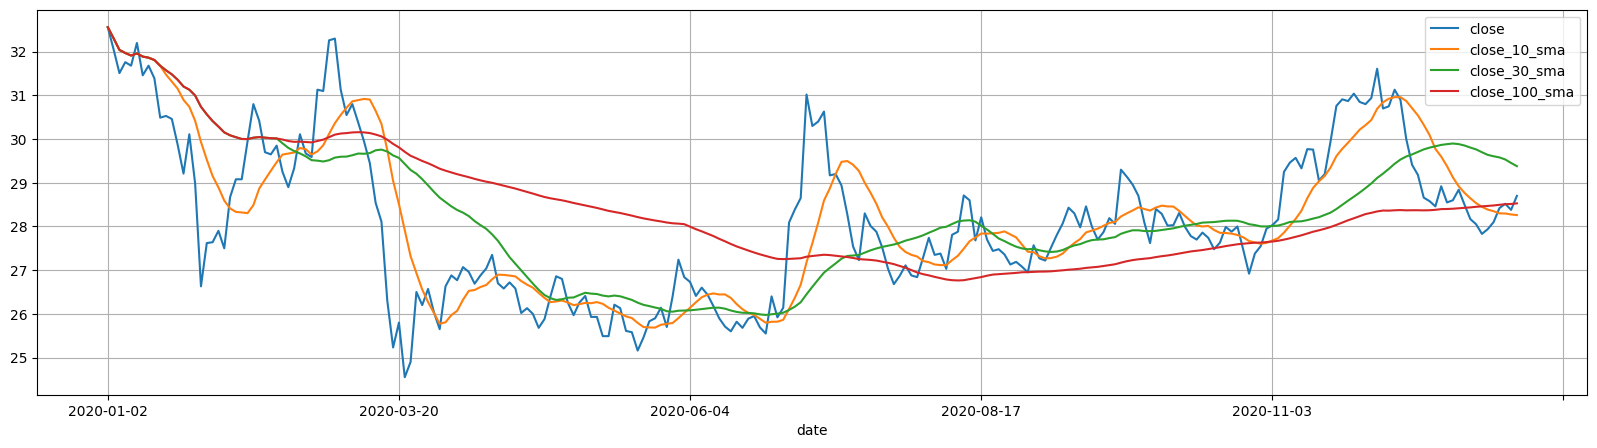

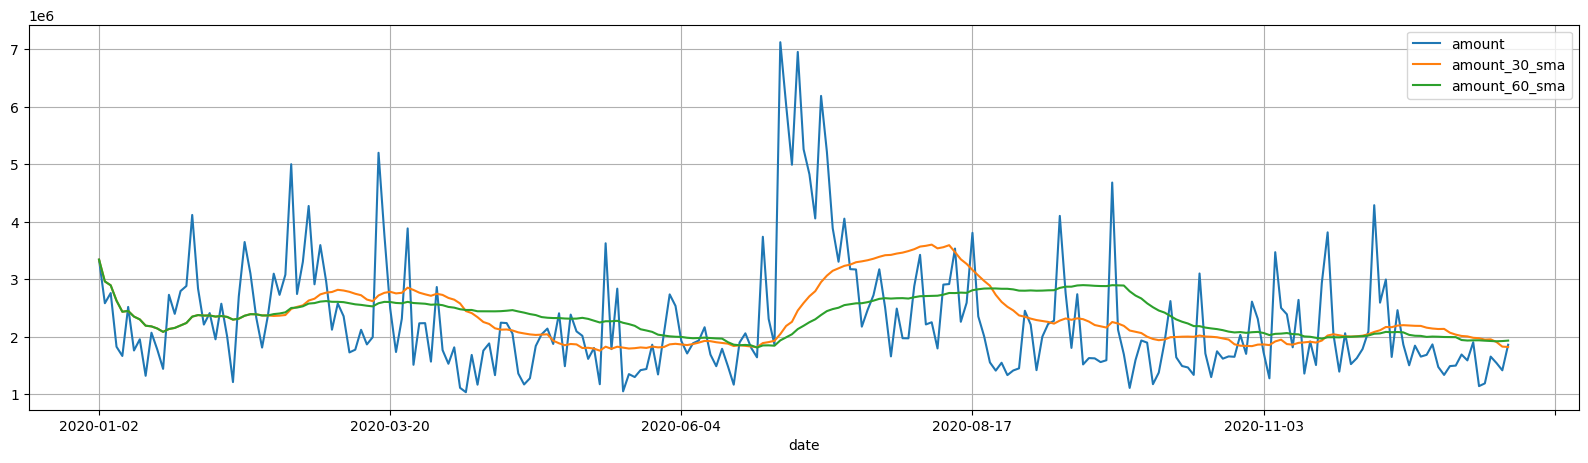

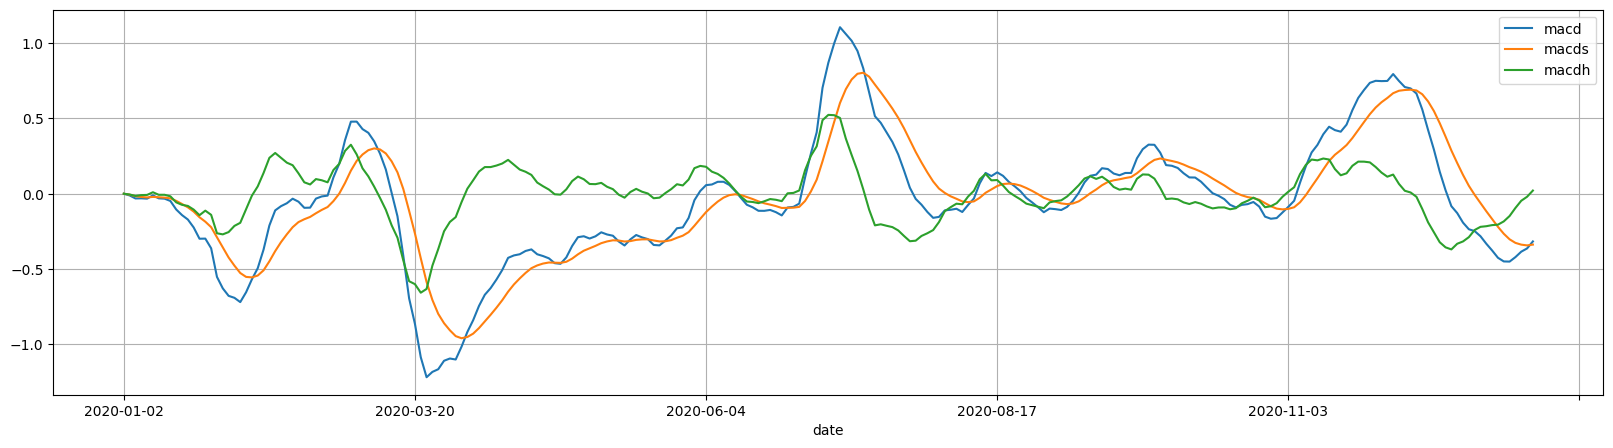

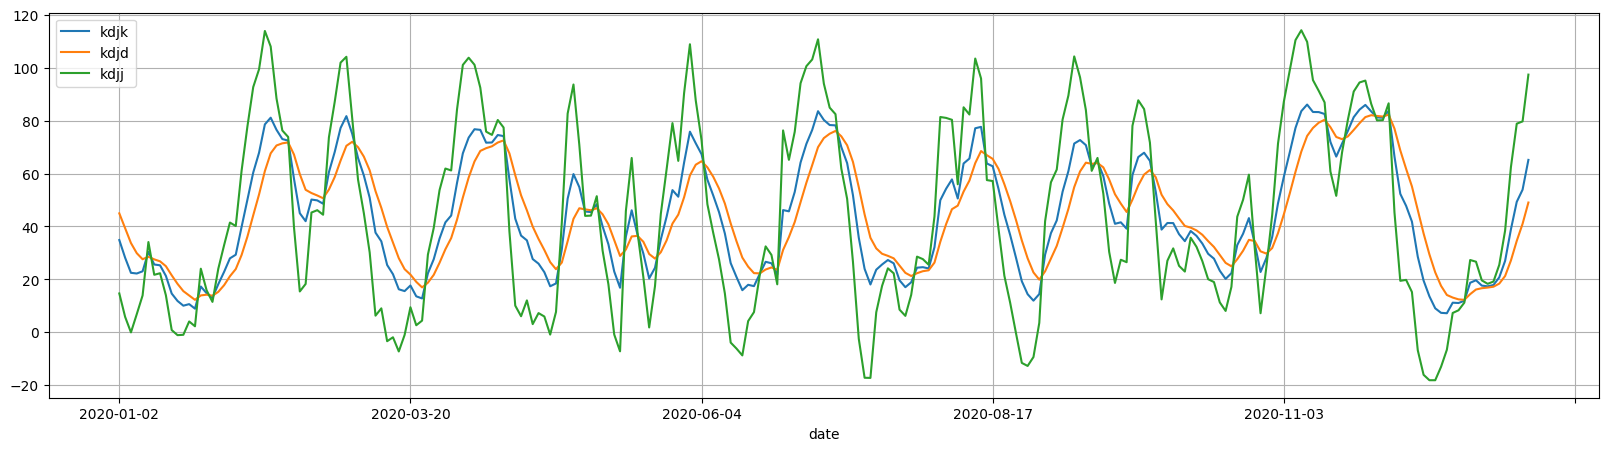

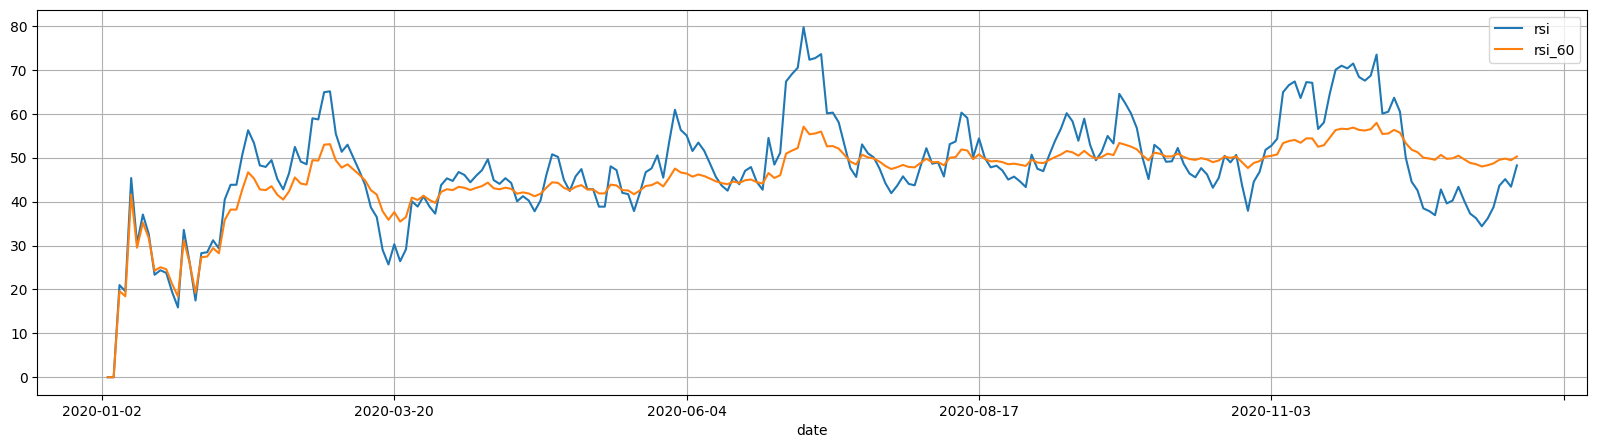

In [34]:
ticker_df[['close','close_10_sma','close_30_sma','close_100_sma']].plot(figsize=(20,5), grid=True)
ticker_df[['amount','amount_30_sma','amount_60_sma']].plot(figsize=(20,5), grid=True)
ticker_df[['macd','macds','macdh']].plot(figsize=(20,5), grid=True)
ticker_df[['kdjk','kdjd','kdjj']].plot(figsize=(20,5), grid=True)
ticker_df[['rsi','rsi_60']].plot(figsize=(20,5), grid=True)